## Подключение необходимых модулей

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from rdp import rdp
from PIL import Image, ImageDraw
from funcs import plot_curve, vectorize_image, smooth, DP_approx, DP_approx_optimized, graph_search_approx, piecewise_linear_approx, RJ_approx

## Загрузка изображений

In [2]:
# Загружаем изображения
first_sample = Image.open("random_sample1.jpg")
second_sample = Image.open("random_sample2.jpg")
third_sample = Image.open("random_sample3.jpg")
fourth_sample = Image.open("random_sample4.jpg")
fifth_sample = Image.open("random_sample5.jpg")

In [3]:
# Обрабатываем изображения и получаем пригодные для работы алгоритма изображения
first_in_vec = vectorize_image(first_sample)
second_in_vec = vectorize_image(second_sample)
third_in_vec = vectorize_image(third_sample)
fourth_in_vec = vectorize_image(fourth_sample)
fifth_in_vec = vectorize_image(fifth_sample)

# Создаем сглаженные копии изображений для дальнейшей обработки в "медленных" алгоритмах
first_smoothed = smooth(first_in_vec, 100)
second_smoothed = smooth(second_in_vec, 80)
third_smoothed = smooth(third_in_vec, 70)
fourth_smoothed = smooth(fourth_in_vec, 60)
fifth_smoothed = smooth(fifth_in_vec, 40)

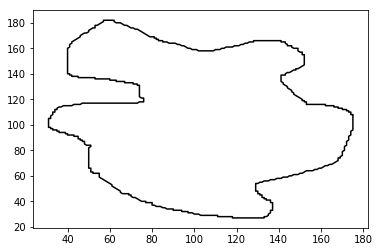

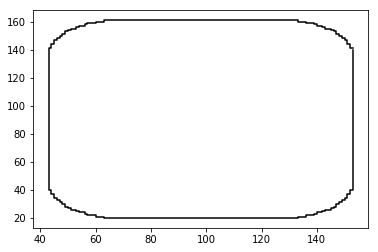

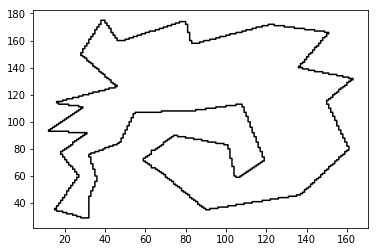

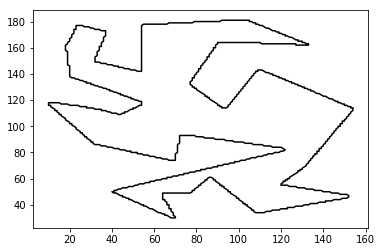

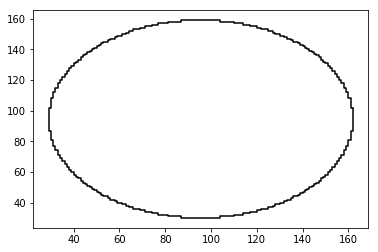

In [4]:
# Выводим на экран загруженные кривые
plot_curve(first_in_vec)
plot_curve(second_in_vec)
plot_curve(third_in_vec)
plot_curve(fourth_in_vec)
plot_curve(fifth_in_vec)

## Применение DP(dynamic programming) алгоримов

### Наивная реализация за $O(N^3M)$

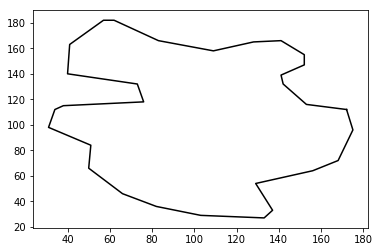

Egdes: 30
CPU times: user 13.5 s, sys: 126 ms, total: 13.6 s
Wall time: 13.8 s


In [5]:
%%time
DP_first = DP_approx(first_smoothed, 30)
plot_curve(DP_first)
print "Egdes:", len(DP_first) - 1

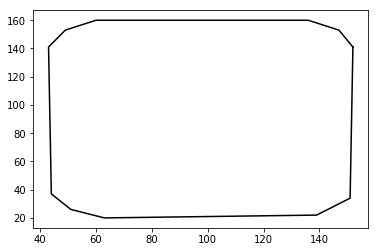

Egdes: 11
CPU times: user 7.57 s, sys: 53.1 ms, total: 7.62 s
Wall time: 7.76 s


In [6]:
%%time
DP_second = DP_approx(second_smoothed, 11)
plot_curve(DP_second)
print "Egdes:", len(DP_second) - 1

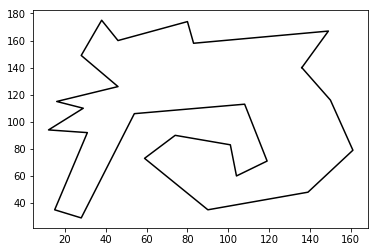

Egdes: 25
CPU times: user 7.58 s, sys: 65.2 ms, total: 7.65 s
Wall time: 7.86 s


In [7]:
%%time
DP_third = DP_approx(third_smoothed, 25)
plot_curve(DP_third)
print "Egdes:", len(DP_third) - 1

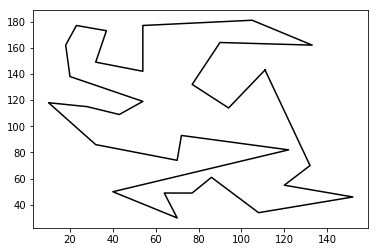

Egdes: 30
CPU times: user 6.67 s, sys: 87.5 ms, total: 6.75 s
Wall time: 6.85 s


In [8]:
%%time
DP_fourth = DP_approx(fourth_smoothed, 30)
plot_curve(DP_fourth)
print "Egdes:", len(DP_fourth) - 1

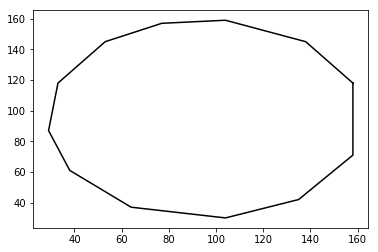

Egdes: 12
CPU times: user 416 ms, sys: 9.12 ms, total: 425 ms
Wall time: 429 ms


In [9]:
%%time
DP_fifth = DP_approx(fifth_smoothed, 12)
plot_curve(DP_fifth)
print "Egdes:", len(DP_fifth) - 1

### Более оптимизированная версия этого алгоритма с асимптотикой $O(N^3)$

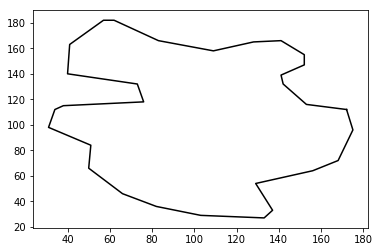

Egdes: 30
CPU times: user 824 ms, sys: 17 ms, total: 841 ms
Wall time: 846 ms


In [10]:
%%time
DP_opt_first = DP_approx_optimized(first_smoothed, 30)
plot_curve(DP_opt_first)
print "Egdes:", len(DP_opt_first) - 1

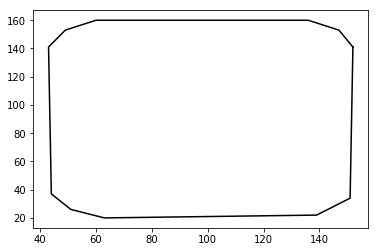

Egdes: 11
CPU times: user 924 ms, sys: 15.2 ms, total: 939 ms
Wall time: 948 ms


In [11]:
%%time
DP_opt_second = DP_approx_optimized(second_smoothed, 11)
plot_curve(DP_opt_second)
print "Egdes:", len(DP_opt_second) - 1

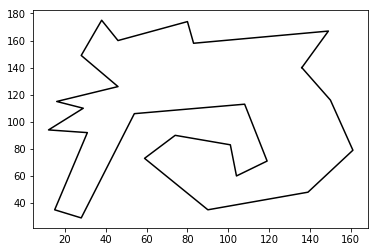

Egdes: 25
CPU times: user 609 ms, sys: 13.5 ms, total: 623 ms
Wall time: 629 ms


In [12]:
%%time
DP_opt_third = DP_approx_optimized(third_smoothed, 25)
plot_curve(DP_opt_third)
print "Egdes:", len(DP_opt_third) - 1

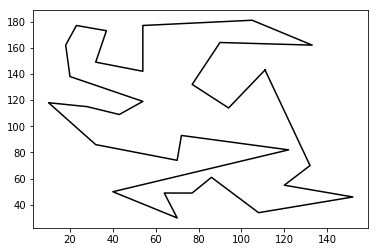

Egdes: 30
CPU times: user 532 ms, sys: 17.1 ms, total: 549 ms
Wall time: 552 ms


In [13]:
%%time
DP_opt_fourth = DP_approx_optimized(fourth_smoothed, 30)
plot_curve(DP_opt_fourth)
print "Egdes:", len(DP_opt_fourth) - 1

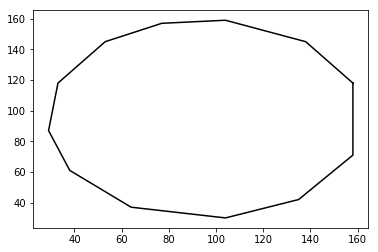

Egdest: 12
CPU times: user 198 ms, sys: 10.3 ms, total: 208 ms
Wall time: 210 ms


In [14]:
%%time
DP_opt_fifth = DP_approx_optimized(fifth_smoothed, 12)
plot_curve(DP_opt_fifth)
print "Egdest:", len(DP_opt_fifth) - 1

Применение на несглаженных версиях изображений

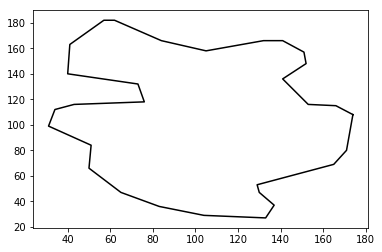

Egdes: 30
CPU times: user 1min 53s, sys: 965 ms, total: 1min 54s
Wall time: 1min 55s


In [15]:
%%time
DP_opt_first_hard_test = DP_approx_optimized(first_in_vec, 30)
plot_curve(DP_opt_first_hard_test)
print "Egdes:", len(DP_opt_first_hard_test) - 1

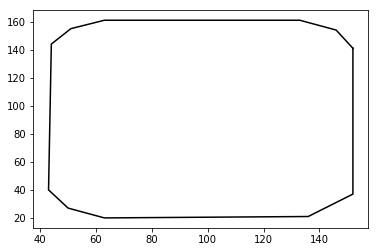

Egdes: 11
CPU times: user 1min 4s, sys: 750 ms, total: 1min 4s
Wall time: 1min 7s


In [38]:
%%time
DP_opt_second_hard_test = DP_approx_optimized(second_in_vec, 11)
plot_curve(DP_opt_second_hard_test)
print "Egdes:", len(DP_opt_second_hard_test) - 1

## Применение Graph-Search алгоритма

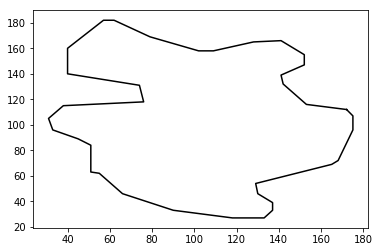

Edges: 36
CPU times: user 495 ms, sys: 11 ms, total: 506 ms
Wall time: 508 ms


In [17]:
%%time
GS_first = graph_search_approx(first_smoothed, epsilon=3)
plot_curve(GS_first)
print "Edges:", len(GS_first) - 1

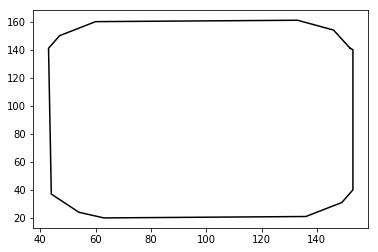

Edges: 13
CPU times: user 562 ms, sys: 11 ms, total: 573 ms
Wall time: 581 ms


In [18]:
%%time
GS_second = graph_search_approx(second_smoothed, epsilon=3)
plot_curve(GS_second)
print "Edges:", len(GS_second) - 1

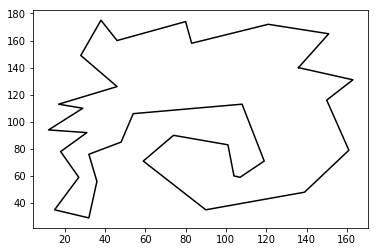

Edges: 33
CPU times: user 388 ms, sys: 12.8 ms, total: 401 ms
Wall time: 400 ms


In [19]:
%%time
GS_third = graph_search_approx(third_smoothed, epsilon=6)
plot_curve(GS_third)
print "Edges:", len(GS_third) - 1

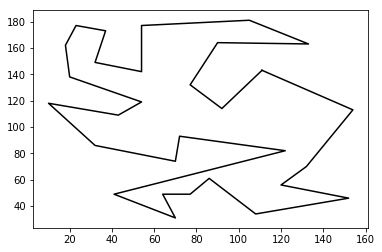

Edges: 30
CPU times: user 363 ms, sys: 13.9 ms, total: 377 ms
Wall time: 379 ms


In [20]:
%%time
GS_fourth = graph_search_approx(fourth_smoothed, epsilon=6)
plot_curve(GS_fourth)
print "Edges:", len(GS_fourth) - 1

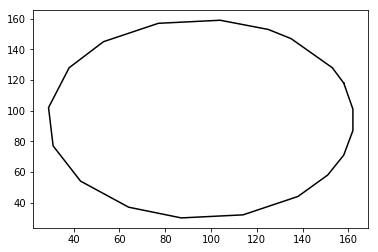

Edges: 19
CPU times: user 276 ms, sys: 13.8 ms, total: 290 ms
Wall time: 303 ms


In [21]:
%%time
GS_fifth = graph_search_approx(fifth_smoothed, epsilon=3)
plot_curve(GS_fifth)
print "Edges:", len(GS_fifth) - 1

Применение на несглаженных версиях изображений

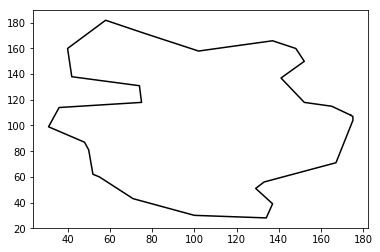

Edges: 30
CPU times: user 59 s, sys: 523 ms, total: 59.6 s
Wall time: 1min


In [39]:
%%time
GS_first_hard_test = graph_search_approx(first_in_vec, epsilon=4)
plot_curve(GS_first_hard_test)
print "Edges:", len(GS_first_hard_test) - 1

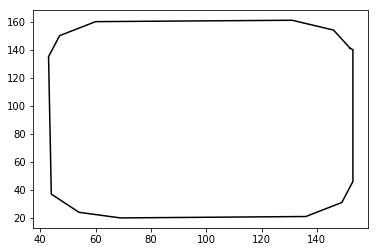

Edges: 13
CPU times: user 32.6 s, sys: 270 ms, total: 32.8 s
Wall time: 33.2 s


In [40]:
%%time
GS_second_hard_test = graph_search_approx(second_in_vec, epsilon=2.8)
plot_curve(GS_second_hard_test)
print "Edges:", len(GS_second_hard_test) - 1

## Применение кусочно-линейной аппроксимизации

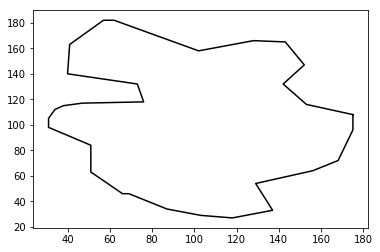

Edges: 31
CPU times: user 216 ms, sys: 17.8 ms, total: 233 ms
Wall time: 231 ms


In [20]:
%%time
pw_linear_first = piecewise_linear_approx(first_in_vec, 30)
plot_curve(pw_linear_first)
print "Edges:", len(pw_linear_first) - 1

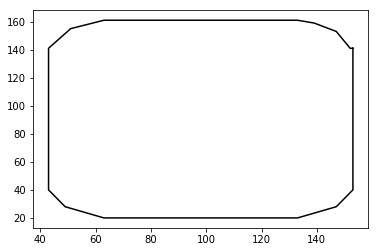

Edges: 15
CPU times: user 176 ms, sys: 14.4 ms, total: 190 ms
Wall time: 182 ms


In [19]:
%%time
pw_linear_second = piecewise_linear_approx(second_in_vec, 16)
plot_curve(pw_linear_second)
print "Edges:", len(pw_linear_second) - 1

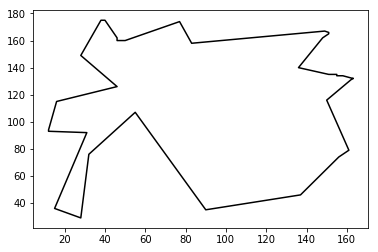

Edges: 33
CPU times: user 179 ms, sys: 7.7 ms, total: 186 ms
Wall time: 185 ms


In [8]:
%%time
pw_linear_third = piecewise_linear_approx(third_in_vec, 35)
plot_curve(pw_linear_third)
print "Edges:", len(pw_linear_third) - 1

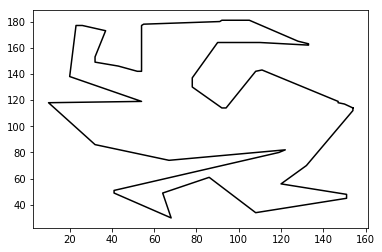

Edges: 46
CPU times: user 188 ms, sys: 12 ms, total: 200 ms
Wall time: 195 ms


In [22]:
%%time
pw_linear_fourth = piecewise_linear_approx(fourth_in_vec, 50)
plot_curve(pw_linear_fourth)
print "Edges:", len(pw_linear_fourth) - 1

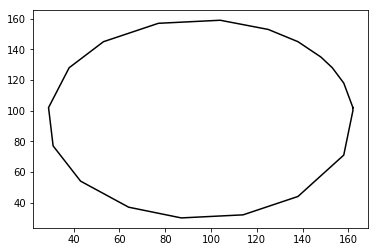

Edges: 19
CPU times: user 195 ms, sys: 12.9 ms, total: 208 ms
Wall time: 208 ms


In [10]:
%%time
pw_linear_fifth = piecewise_linear_approx(fifth_in_vec, 18)
plot_curve(pw_linear_fifth)
print "Edges:", len(pw_linear_fifth) - 1

Применение на сглаженных версиях

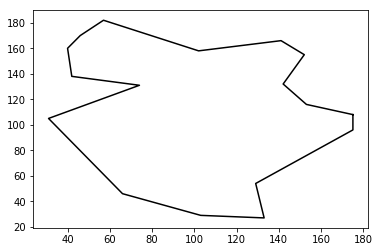

Edges: 17
CPU times: user 191 ms, sys: 13.9 ms, total: 205 ms
Wall time: 201 ms


In [23]:
%%time
pw_linear_first_easy = piecewise_linear_approx(first_smoothed, 16)
plot_curve(pw_linear_first_easy)
print "Edges:", len(pw_linear_first_easy) - 1

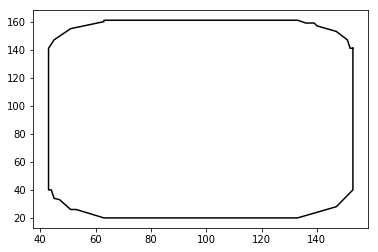

Edges: 23
CPU times: user 172 ms, sys: 13.9 ms, total: 186 ms
Wall time: 179 ms


In [24]:
%%time
pw_linear_second_easy = piecewise_linear_approx(second_smoothed, 30)
plot_curve(pw_linear_second_easy)
print "Edges:", len(pw_linear_second_easy) - 1

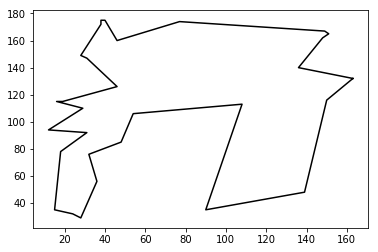

Edges: 30
CPU times: user 175 ms, sys: 17.3 ms, total: 192 ms
Wall time: 182 ms


In [25]:
%%time
pw_linear_third_easy = piecewise_linear_approx(third_smoothed, 35)
plot_curve(pw_linear_third_easy)
print "Edges:", len(pw_linear_third_easy) - 1

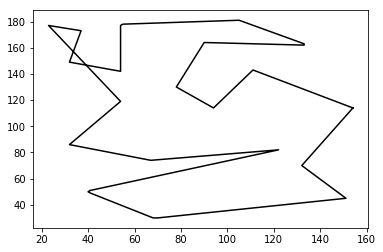

Edges: 25
CPU times: user 186 ms, sys: 30.7 ms, total: 216 ms
Wall time: 215 ms


In [26]:
%%time
pw_linear_fourth_easy = piecewise_linear_approx(fourth_smoothed, 30)
plot_curve(pw_linear_fourth_easy)
print "Edges:", len(pw_linear_fourth_easy) - 1

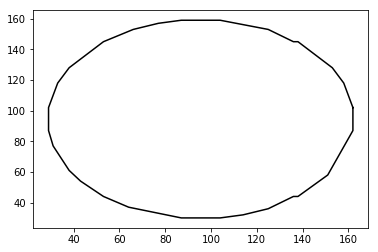

Edges: 28
CPU times: user 159 ms, sys: 7.65 ms, total: 167 ms
Wall time: 164 ms


In [36]:
%%time
pw_linear_fifth_easy = piecewise_linear_approx(fifth_smoothed, 35)
plot_curve(pw_linear_fifth_easy)
print "Edges:", len(pw_linear_fifth_easy) - 1

## Применение RJ(Rosenfeld-Johnson) алгоритма

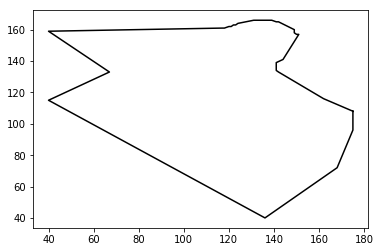

Edges: 38
CPU times: user 673 ms, sys: 12 ms, total: 685 ms
Wall time: 696 ms


In [27]:
%%time
RJ_first = RJ_approx(first_in_vec, 0.15)
plot_curve(RJ_first)
print "Edges:", len(RJ_first) - 1

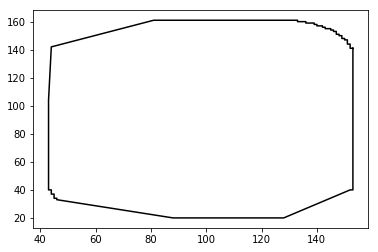

Edges: 216
CPU times: user 905 ms, sys: 10.8 ms, total: 916 ms
Wall time: 926 ms


In [28]:
%%time
RJ_second = RJ_approx(second_in_vec, 0.2)
plot_curve(RJ_second)
print "Edges:", len(RJ_second) - 1

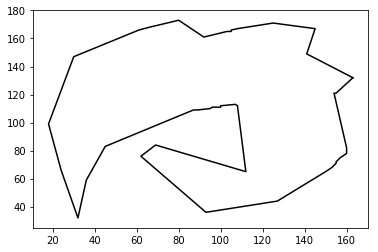

Edges: 41
CPU times: user 776 ms, sys: 24.3 ms, total: 800 ms
Wall time: 826 ms


In [29]:
%%time
RJ_third = RJ_approx(third_in_vec, 0.05)
plot_curve(RJ_third)
print "Edges:", len(RJ_third) - 1

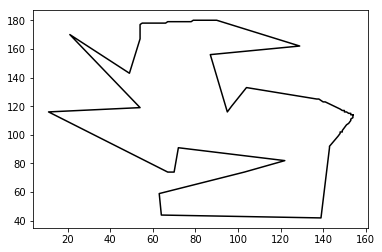

Edges: 82
CPU times: user 682 ms, sys: 17.2 ms, total: 699 ms
Wall time: 729 ms


In [30]:
%%time
RJ_fourth = RJ_approx(fourth_in_vec, 0.05)
plot_curve(RJ_fourth)
print "Edges:", len(RJ_fourth) - 1

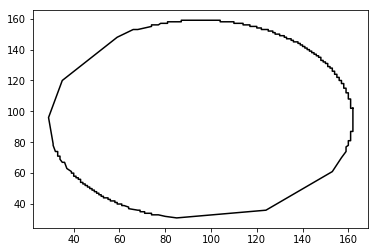

Edges: 257
CPU times: user 673 ms, sys: 13.7 ms, total: 687 ms
Wall time: 695 ms


In [31]:
%%time
RJ_fifth = RJ_approx(fifth_in_vec, 0.1)
plot_curve(RJ_fifth)
print "Edges:", len(RJ_fifth) - 1

Применение на сглаженных версиях изображений

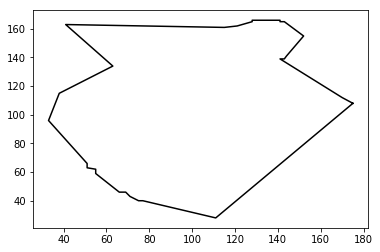

Edges: 27
CPU times: user 181 ms, sys: 7.04 ms, total: 188 ms
Wall time: 185 ms


In [37]:
%%time
RJ_first_easy = RJ_approx(first_smoothed, 0.15)
plot_curve(RJ_first_easy)
print "Edges:", len(RJ_first_easy) - 1

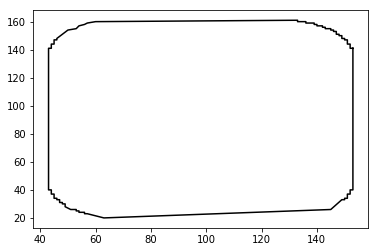

Edges: 74
CPU times: user 232 ms, sys: 7.45 ms, total: 239 ms
Wall time: 236 ms


In [38]:
%%time
RJ_second_easy = RJ_approx(second_smoothed, 0.15)
plot_curve(RJ_second_easy)
print "Edges:", len(RJ_second_easy) - 1

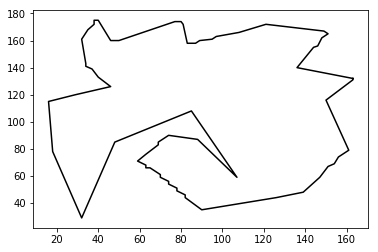

Edges: 63
CPU times: user 177 ms, sys: 5.91 ms, total: 183 ms
Wall time: 182 ms


In [41]:
%%time
RJ_third_easy = RJ_approx(third_smoothed, 0.05)
plot_curve(RJ_third_easy)
print "Edges:", len(RJ_third_easy) - 1

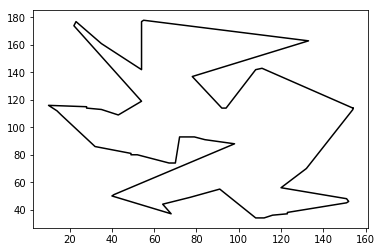

Edges: 48
CPU times: user 182 ms, sys: 11.1 ms, total: 193 ms
Wall time: 188 ms


In [44]:
%%time
RJ_fourth_easy = RJ_approx(fourth_smoothed, 0.05)
plot_curve(RJ_fourth_easy)
print "Edges:", len(RJ_fourth_easy) - 1

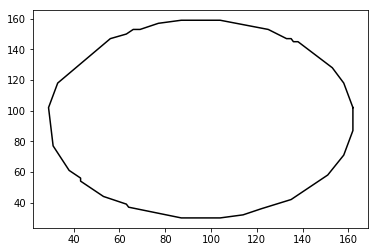

Edges: 33
CPU times: user 162 ms, sys: 5.62 ms, total: 167 ms
Wall time: 167 ms


In [46]:
%%time
RJ_fifth_easy = RJ_approx(fifth_smoothed, 0.15)
plot_curve(RJ_fifth_easy)
print "Edges:", len(RJ_fifth_easy) - 1

## Применение RDP(Ramer-Douglas-Peucker) алгоритма

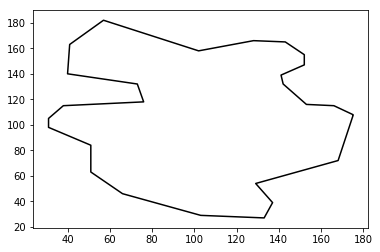

Edges: 26
CPU times: user 266 ms, sys: 6.43 ms, total: 273 ms
Wall time: 273 ms


In [57]:
%%time
rdp_first = rdp(first_in_vec, epsilon=3)
plot_curve(rdp_first)
print "Edges:", len(rdp_first) - 1

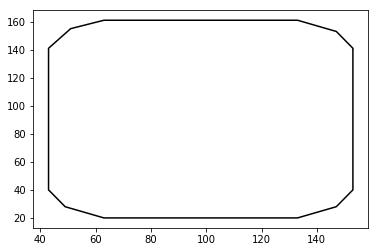

Edges: 12
CPU times: user 226 ms, sys: 6.01 ms, total: 232 ms
Wall time: 232 ms


In [58]:
%%time
rdp_second = rdp(second_in_vec, epsilon=4)
plot_curve(rdp_second)
print "Edges:", len(rdp_second) - 1

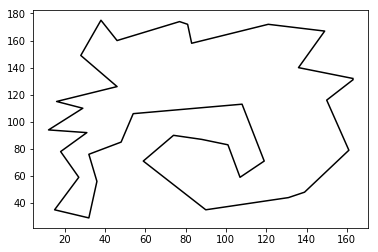

Edges: 35
CPU times: user 383 ms, sys: 6.3 ms, total: 389 ms
Wall time: 389 ms


In [59]:
%%time
rdp_third = rdp(third_in_vec, epsilon=3)
plot_curve(rdp_third)
print "Edges:", len(rdp_third) - 1

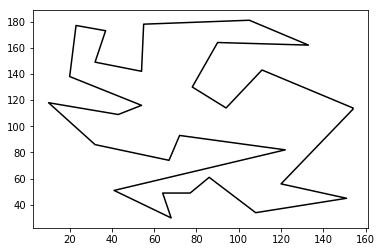

Edges: 28
CPU times: user 365 ms, sys: 14.6 ms, total: 379 ms
Wall time: 375 ms


In [60]:
%%time
rdp_fourth = rdp(fourth_in_vec, epsilon=6)
plot_curve(rdp_fourth)
print "Edges:", len(rdp_fourth) - 1

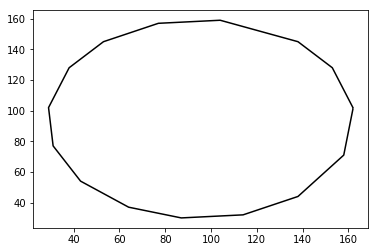

Edges: 15
CPU times: user 348 ms, sys: 12.8 ms, total: 361 ms
Wall time: 373 ms


In [36]:
%%time
rdp_fifth = rdp(fifth_in_vec, epsilon=3)
plot_curve(rdp_fifth)
print "Edges:", len(rdp_fifth) - 1

Применение на сглаженных версиях изображений

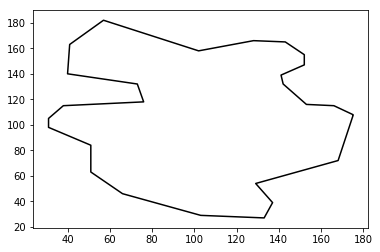

Edges: 26
CPU times: user 195 ms, sys: 6.51 ms, total: 201 ms
Wall time: 201 ms


In [61]:
%%time
rdp_first_easy = rdp(first_smoothed, epsilon=3)
plot_curve(rdp_first_easy)
print "Edges:", len(rdp_first_easy) - 1

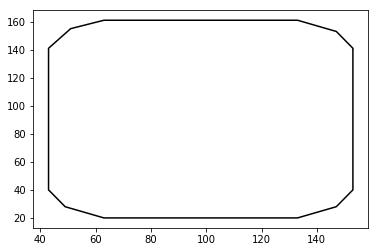

Edges: 12
CPU times: user 176 ms, sys: 6.34 ms, total: 183 ms
Wall time: 183 ms


In [67]:
%%time
rdp_second_easy = rdp(second_smoothed, epsilon=4)
plot_curve(rdp_second_easy)
print "Edges:", len(rdp_second_easy) - 1

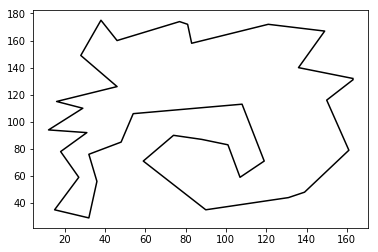

Edges: 35
CPU times: user 232 ms, sys: 8.21 ms, total: 240 ms
Wall time: 238 ms


In [63]:
%%time
rdp_third_easy = rdp(third_smoothed, epsilon=3)
plot_curve(rdp_third_easy)
print "Edges:", len(rdp_third_easy) - 1

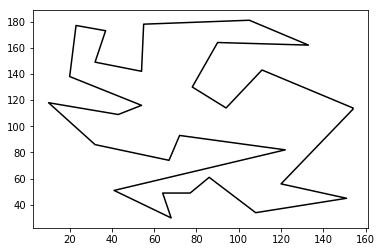

Edges: 28
CPU times: user 188 ms, sys: 4.69 ms, total: 193 ms
Wall time: 193 ms


In [66]:
%%time
rdp_fourth_easy = rdp(fourth_smoothed, epsilon=6)
plot_curve(rdp_fourth_easy)
print "Edges:", len(rdp_fourth_easy) - 1

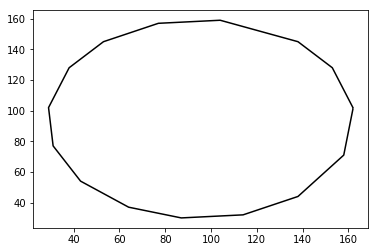

Edges: 15
CPU times: user 177 ms, sys: 8.56 ms, total: 186 ms
Wall time: 184 ms


In [65]:
%%time
rdp_fifth_easy = rdp(fifth_smoothed, epsilon=3)
plot_curve(rdp_fifth_easy)
print "Edges:", len(rdp_fifth_easy) - 1